/tmp/ipykernel_23061/4233473029.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs((density_slice_1-density_slice_2))), origin='lower', aspect='auto', cmap='plasma')


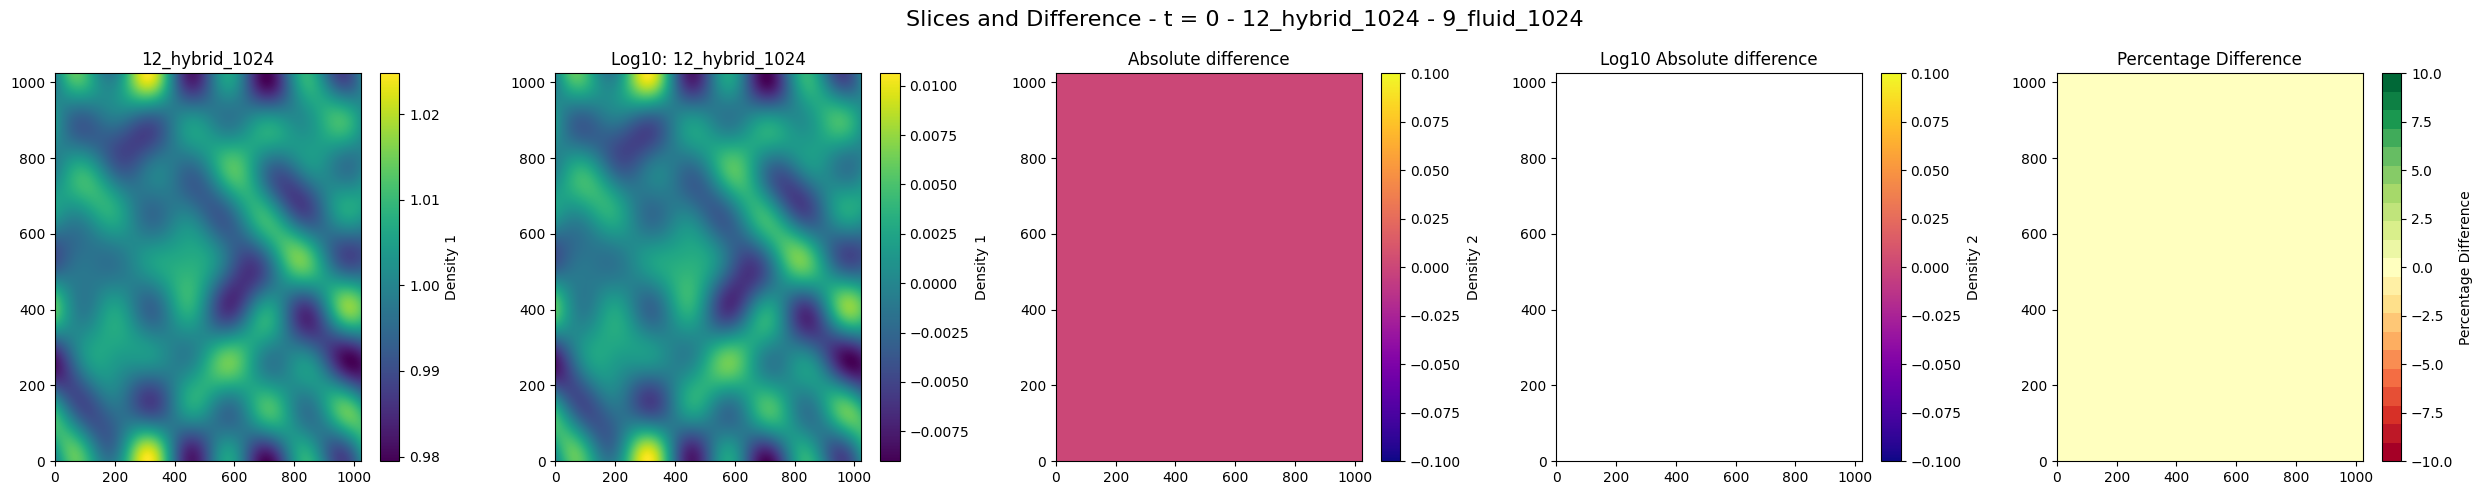

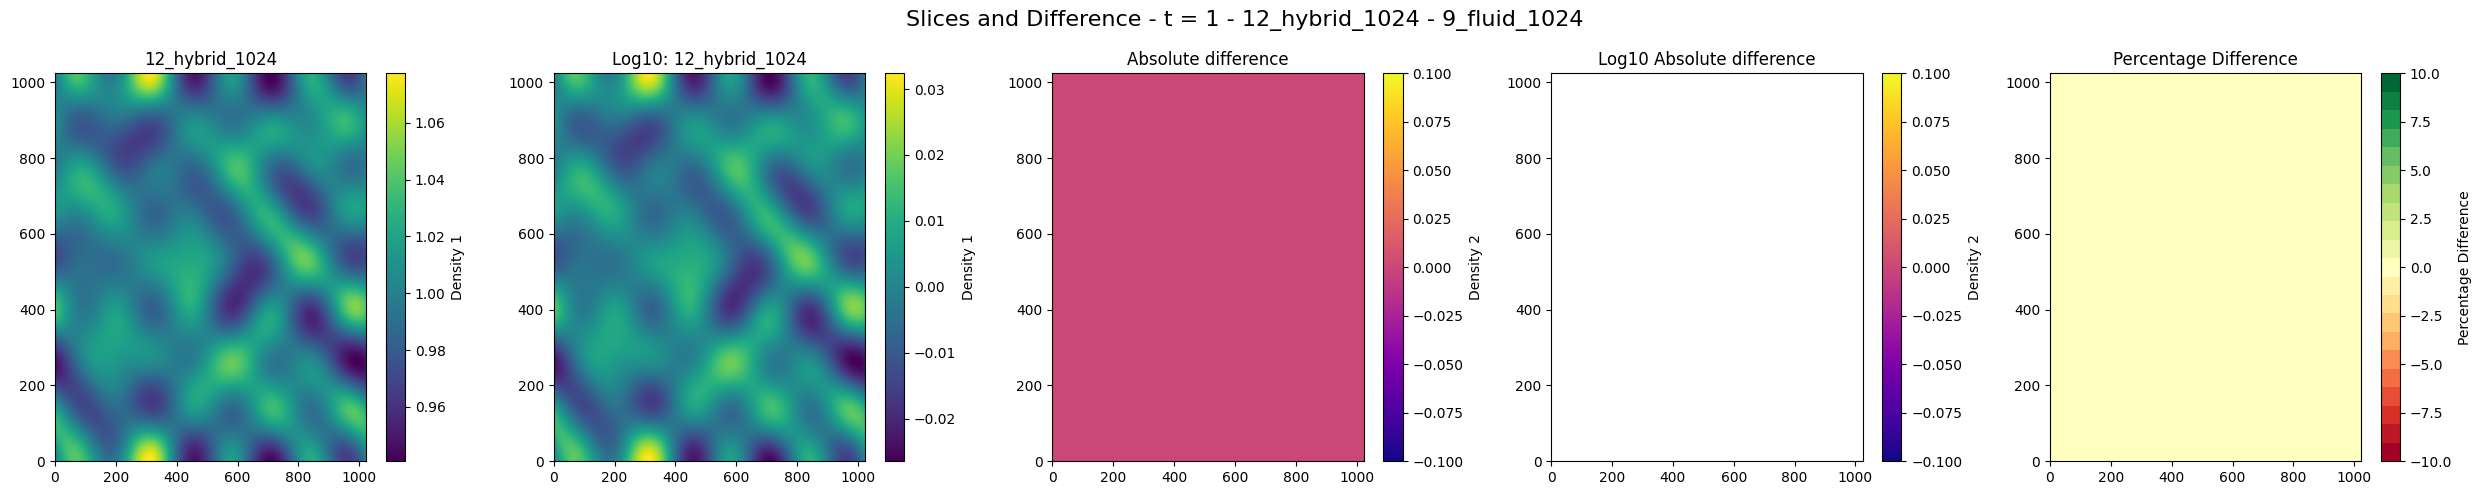

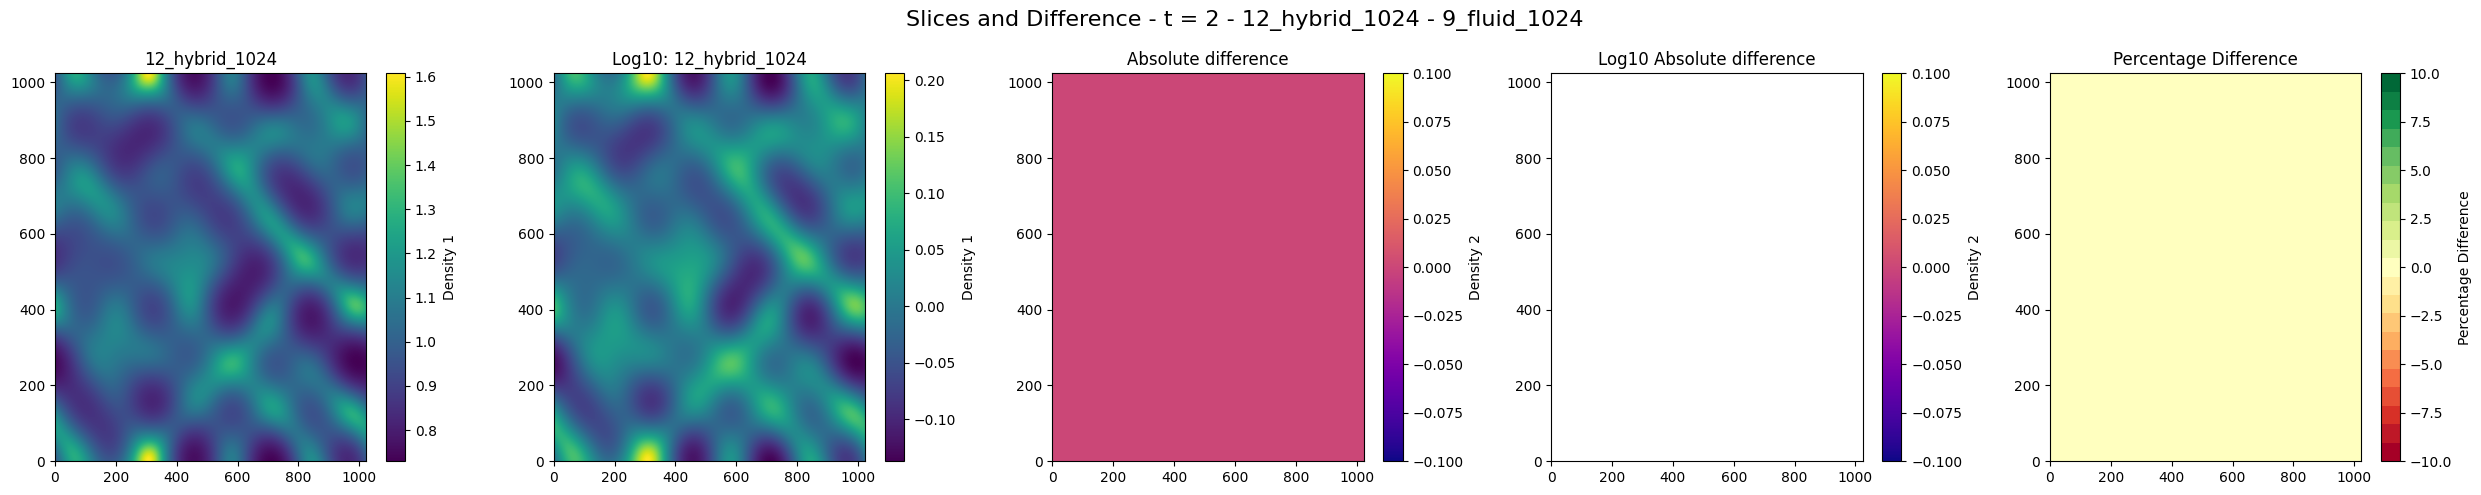

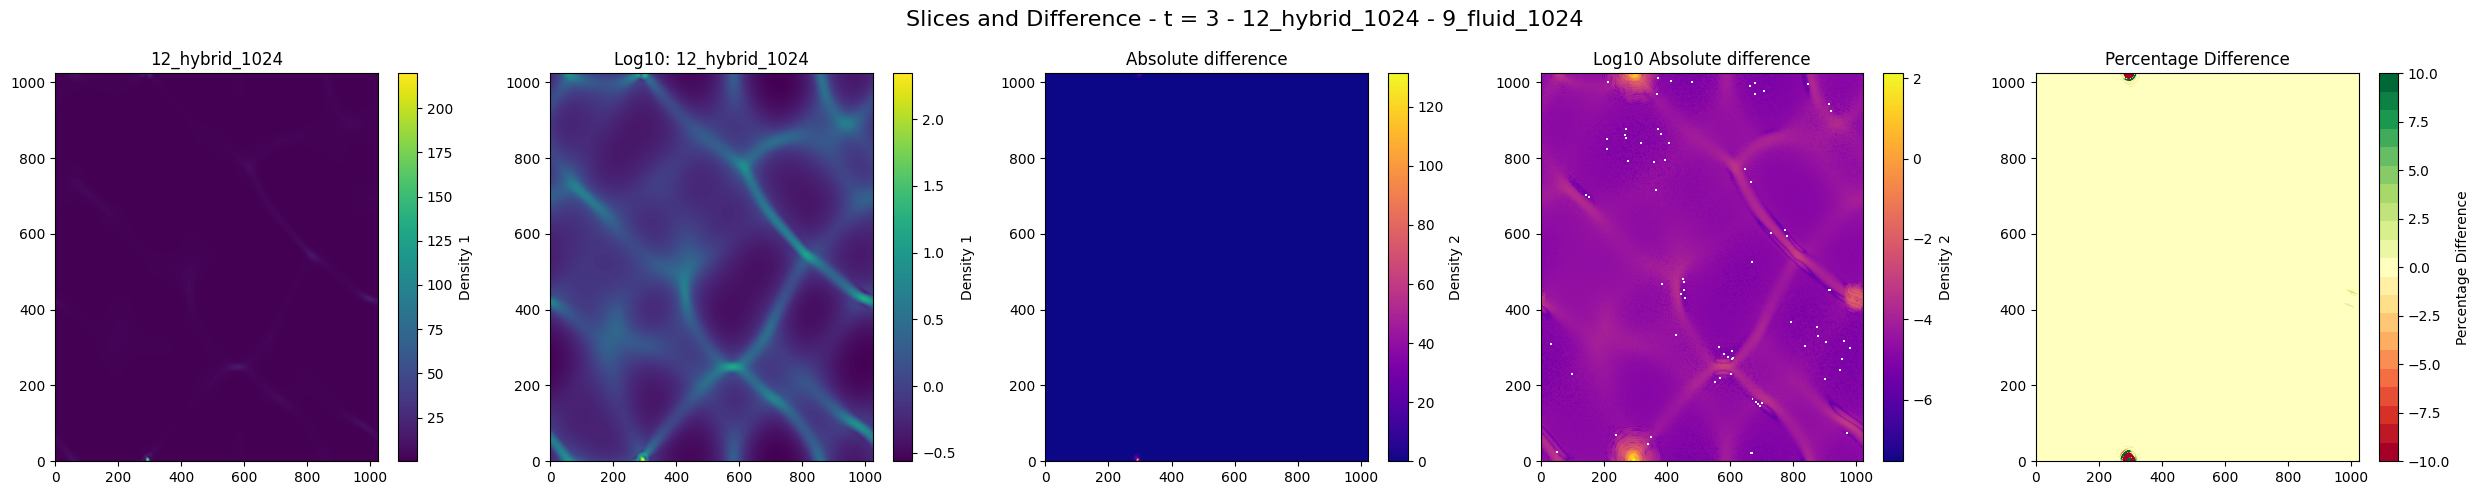

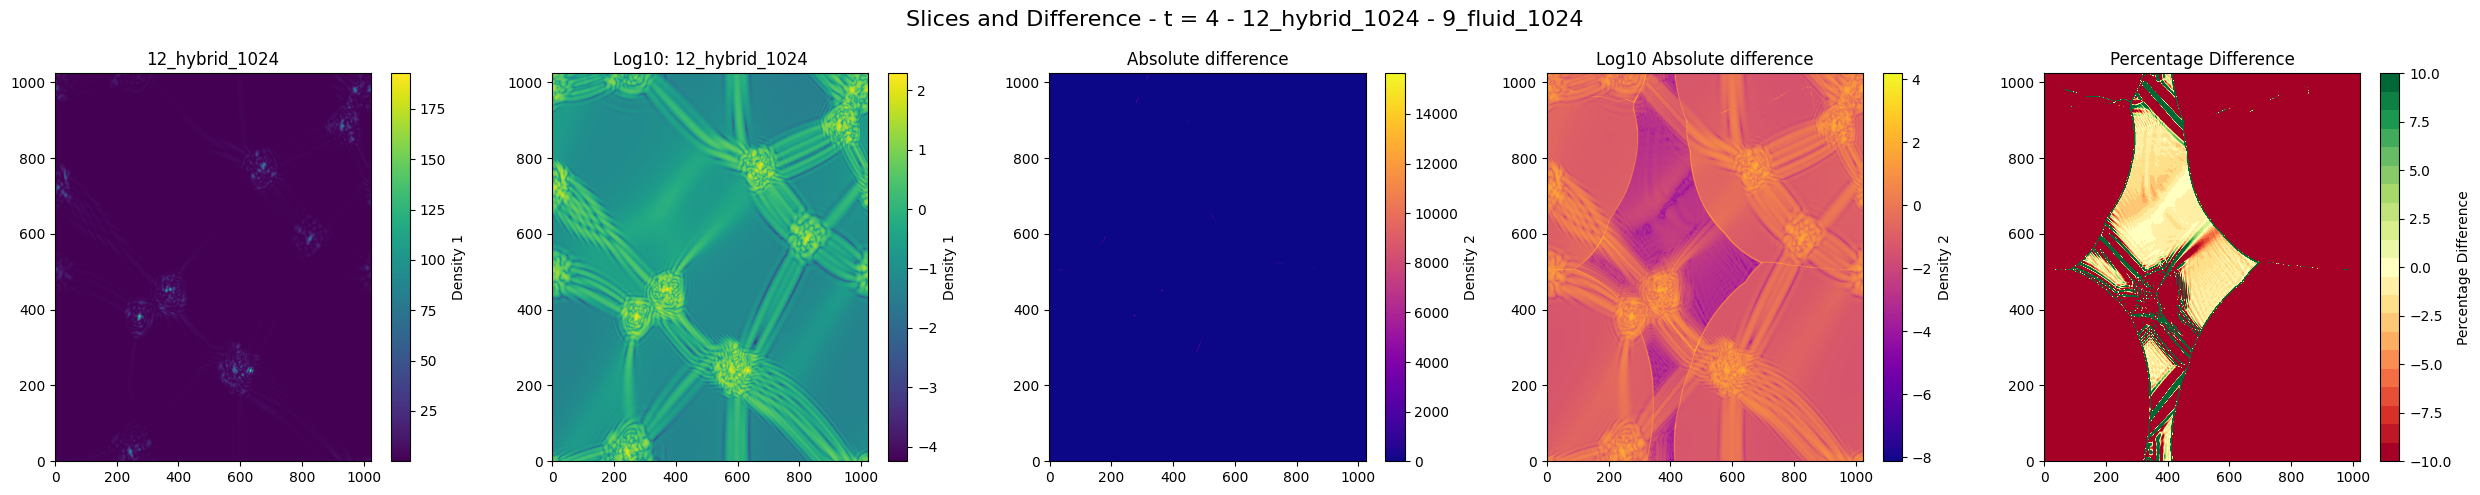

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipyfilechooser import FileChooser
from IPython.display import display

# Create file choosers for the two density slices
#fc1 = FileChooser('/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/5.6_m_22_0.2', title='Select Density Slice 1')
#fc2 = FileChooser('/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/5.6_m_22_0.2', title='Select Density Slice 2')

for slice in range(5): 
    x = 0.00
    n1 = "12_hybrid_1024"
    n2 = "9_fluid_1024"
    fc1 = f"/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/Perturbation/{n1}/density_slice_{slice}_coord_0.00.npy"
    fc2 = f"/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/Perturbation/{n2}/density_slice_{slice}_coord_0.00.npy"
    #x = 1.18
    #n1 = "Spectral - N=512^3"
    #n2 = "Hybrid - as in paper"
    #fc1 = f"/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/5.6_m_22_0.2/Eval_Hybrid_vs_Spectral/density_slice_1_{slice}_coord_{x}.npy"
    #fc2 = f"/home/xerox/Documents/Paper/A hybrid scheme combining fluid and wave solvers/Cosmological/5.6_m_22_0.2/Eval_Hybrid_vs_Spectral/density_slice_2_{slice}_coord_{x}.npy"
    
    # Function to update the plot
    def update_plot():
        density_slice_1 = np.load(fc1)
        density_slice_2 = np.load(fc2)

        # Calculate the difference and percentage
        difference = density_slice_2 - density_slice_1
        percentage_diff = np.clip((difference / density_slice_1) * 100, -100, 100)

        # Set up a categorical color map for percentage differences
        cmap = plt.get_cmap("RdYlGn", 21)  # 21 colors for -100% to +100%

        plt.figure(figsize=(25, 5))

        # Plot density_slice_1
        plt.subplot(1, 5, 1)
        plt.imshow(density_slice_1, origin='lower', aspect='auto', cmap='viridis')
        plt.title(n1)
        plt.colorbar(label='Density 1')
        # Plot density_slice_1
        plt.subplot(1, 5, 2)
        plt.imshow(np.log10(density_slice_1), origin='lower', aspect='auto', cmap='viridis')
        plt.title('Log10: ' + n1)
        plt.colorbar(label='Density 1')

        # Plot density_slice_2
        plt.subplot(1, 5, 3)
        plt.imshow(np.abs((density_slice_1-density_slice_2)), origin='lower', aspect='auto', cmap='plasma')
        plt.title(f'Absolute difference')
        plt.colorbar(label='Density 2')


        # Plot density_slice_2
        plt.subplot(1, 5, 4)
        plt.imshow(np.log10(np.abs((density_slice_1-density_slice_2))), origin='lower', aspect='auto', cmap='plasma')
        plt.title(f'Log10 Absolute difference')
        plt.colorbar(label='Density 2')

        # Plot percentage difference
        plt.subplot(1, 5, 5)
        img = plt.imshow(percentage_diff, origin='lower', aspect='auto', cmap=cmap, vmin=-10, vmax=10)
        plt.title(f'Percentage Difference')
        plt.colorbar(img, label='Percentage Difference')

        plt.suptitle(f'Slices and Difference - t = {slice} - {n1} - {n2}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f"compare_slices/{n1}_{n2}_{slice}_{x}.png")
        plt.show()
        plt.close()


    update_plot()



In [4]:
pip install ipyfilechooser

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
